In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
print(cv2.__version__)

4.5.5


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [255 255 255]
  [247 247 247]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(812, 639, 3)


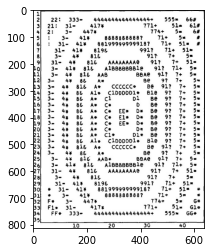

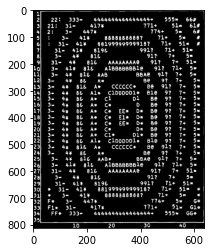

In [16]:
img = cv2.imread('fig1.jpg')
img9 = ~img
print(img)
print(img.shape)
plt.imshow(img)
plt.show()
plt.imshow(img9)
plt.show()

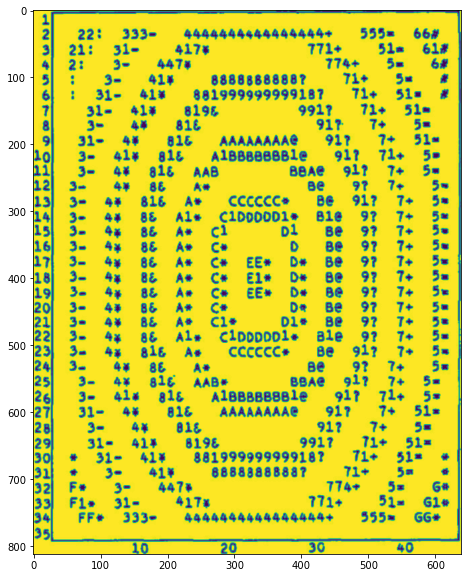

[[  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(812, 639)


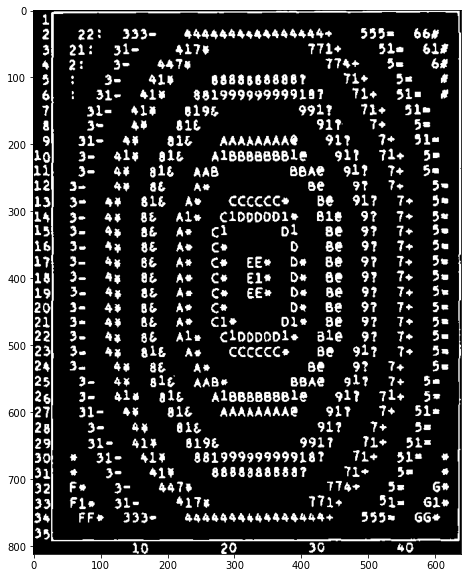

In [3]:
threshold_value= 250
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
plt.figure(figsize=(10,10))
plt.imshow(gray_img)
plt.show()
ret, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#inverts image
img2 = ~binary_img
print(img2)
print(img2.shape)
plt.figure(figsize=(10,10))
plt.imshow(img2, 'gray')
plt.show()

In [12]:
contours, hierarchy = cv2.findContours(img2.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [5]:
print(contours[2])

[[[298 797]]

 [[301 800]]

 [[301 803]]

 [[300 804]]

 [[300 805]]

 [[298 807]]

 [[297 807]]

 [[295 805]]

 [[295 800]]]


In [18]:
sortedContours = sorted(contours, key = lambda x: cv2.contourArea(x))
for i in range(2):
    sortedContours.pop()

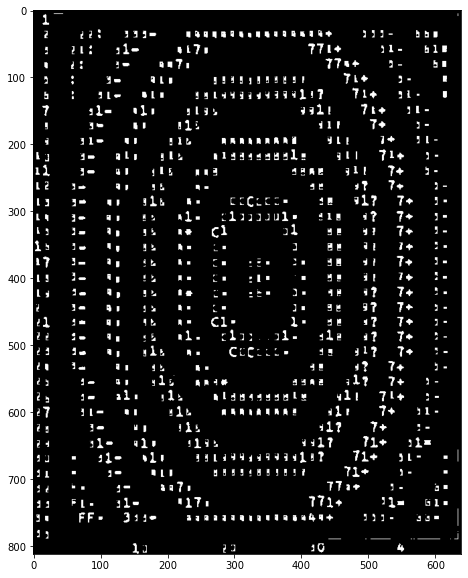

In [19]:
img3 = cv2.drawContours(img2.copy(),sortedContours,-1,255)
plt.figure(figsize=(10,10))
plt.imshow(img3,'gray')
plt.show() 

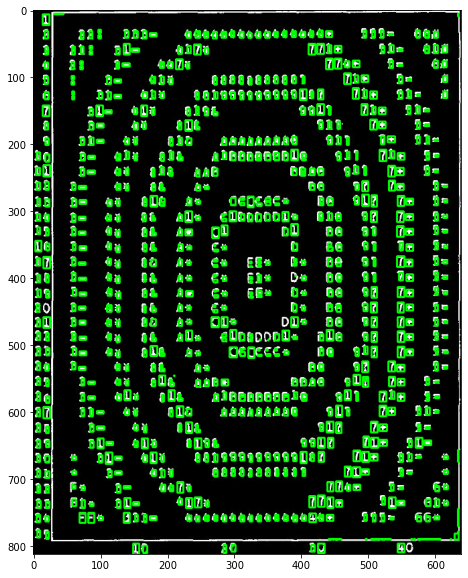

In [23]:
img3_copy= img3.copy()
for c in sortedContours:
    x, y, w, h = cv2.boundingRect(c)
    #if (cv2.contourArea(c)) > 500:
    cv2.rectangle(img9, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(img9)
plt.show()    

In [24]:
cv2.imwrite("Output.jpg", img9)

True